In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from descartes.patch import PolygonPatch

df = pd.read_csv('GFM_data.csv', sep = '\t')


df.head()

,Unnamed: 0,Url,Category,Position,Title,Location,Amount_Raised,Goal,Number_of_Donations,Length_of_Fundraising,FB_Shares,Number_of_Donors,Followers,Text
0,0,https://www.gofundme.com/f/justiceforjacobblake,Medical,0,Justice for Jacob Blake,"Kenosha, WI",2297930.0,3000000.0,73K,93 days 12:02:38.405126000,118K,72.5K,73.4K,On August 23rd my son was shot multiple times ...
1,0,https://www.gofundme.com/f/official-navajo-nat...,Medical,0,Official Navajo Nation COVID-19 Relief Fund,"Window Rock, AZ",1862040.0,1000000.0,22.5K,205 days 12:02:39.366241000,71.7K,21.9K,22K,\nThe Navajo Nation COVID-19 Fund has been est...
2,0,https://www.gofundme.com/f/help-a-front-line-n...,Medical,0,Help a front line nurse and baby get proper care,"Randolph, NJ",954793.0,1200000.0,19K,215 days 12:02:40.340314000,16.4K,18.3K,17.9K,"On Sunday, April 12, Sylvia Leroy, a pregnant ..."
3,0,https://www.gofundme.com/f/Tommy-Rivers-Rest-Up,Medical,1,"Rest up, Tommy, we'll see you soon","Scottsdale, AZ",673179.0,1000000.0,11.3K,131 days 12:02:41.464483000,21.3K,10.3K,10.4K,"First, thank you for being here. Tommy Rivers ..."
4,0,https://www.gofundme.com/f/brandon039s-medical...,Medical,1,OFFICIAL BRANDON SAENZ MEDICAL FUND,"Tyler, TX",570529.0,750000.0,24.7K,175 days 12:02:42.383091000,5.5K,24.3K,24.5K,My name is Melissa Green and I am the mother o...


## Cleaning the data

Transforming Number_of_Donations, FB_Shares, Number_of_Donors, and Followers from Strings to floats

In [27]:
def helper(x):
    ## if string will make numeric
    if isinstance(x,str):
        x = x.replace(',','')
        ## if has ".1k" will change to numeric
        if '.' in x and 'K' in x:
            x = x.replace('.','')
            x = x.replace('K','00')
        ## if "k" will change to numeric
        if 'K' in x:
            x = x.replace('K','000')
        return x
    ## return nan
    else:
        return x
df['Number_of_Donations'] = df['Number_of_Donations'].apply(helper).astype(float)
df['FB_Shares'] = df['FB_Shares'].apply(helper).astype(float)
df['Number_of_Donors'] = df['Number_of_Donors'].apply(helper).astype(float)
df['Followers'] = df['Followers'].apply(helper).astype(float)

In [28]:
df = df.dropna()

In [29]:
df['Length_of_Fundraising']= df['Length_of_Fundraising'].apply(lambda x: int(x[:-24]))

In [30]:
df.head()

,Unnamed: 0,Url,Category,Position,Title,Location,Amount_Raised,Goal,Number_of_Donations,Length_of_Fundraising,FB_Shares,Number_of_Donors,Followers,Text
0,0,https://www.gofundme.com/f/justiceforjacobblake,Medical,0,Justice for Jacob Blake,"Kenosha, WI",2297930.0,3000000.0,73000.0,93,118000.0,72500.0,73400.0,On August 23rd my son was shot multiple times ...
1,0,https://www.gofundme.com/f/official-navajo-nat...,Medical,0,Official Navajo Nation COVID-19 Relief Fund,"Window Rock, AZ",1862040.0,1000000.0,22500.0,205,71700.0,21900.0,22000.0,\nThe Navajo Nation COVID-19 Fund has been est...
2,0,https://www.gofundme.com/f/help-a-front-line-n...,Medical,0,Help a front line nurse and baby get proper care,"Randolph, NJ",954793.0,1200000.0,19000.0,215,16400.0,18300.0,17900.0,"On Sunday, April 12, Sylvia Leroy, a pregnant ..."
3,0,https://www.gofundme.com/f/Tommy-Rivers-Rest-Up,Medical,1,"Rest up, Tommy, we'll see you soon","Scottsdale, AZ",673179.0,1000000.0,11300.0,131,21300.0,10300.0,10400.0,"First, thank you for being here. Tommy Rivers ..."
4,0,https://www.gofundme.com/f/brandon039s-medical...,Medical,1,OFFICIAL BRANDON SAENZ MEDICAL FUND,"Tyler, TX",570529.0,750000.0,24700.0,175,5500.0,24300.0,24500.0,My name is Melissa Green and I am the mother o...


# Exploration

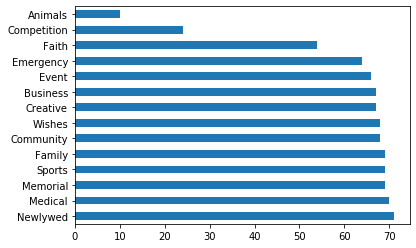

In [31]:
df['Category'].value_counts().plot(kind='barh')

In [32]:
grouped_df = df.groupby('Category')[['Amount_Raised','Goal','Number_of_Donations', 'Length_of_Fundraising', 'FB_Shares', 'Number_of_Donors', 'Followers']].mean()

Text(0.5, 1.0, 'Avg Amount Raised per Category')

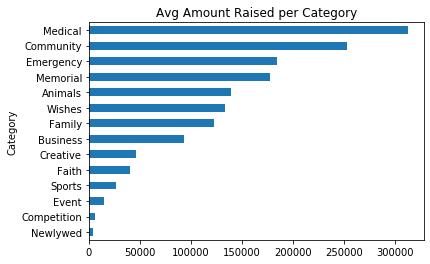

In [33]:
grouped_df['Amount_Raised'].sort_values().plot(kind = 'barh')
plt.title('Avg Amount Raised per Category')

In [34]:
df['Amount_Raised'].describe()

count    8.360000e+02
mean     1.158010e+05
std      3.220597e+05
min      6.370000e+02
25%      1.953400e+04
50%      5.287100e+04
75%      1.234118e+05
max      6.750030e+06
Name: Amount_Raised, dtype: float64

In [35]:
df['Reach Goal?'] = df['Amount_Raised'] < df['Goal']

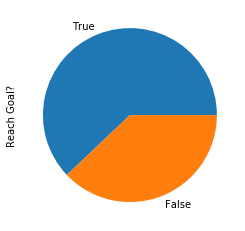

In [36]:
df['Reach Goal?'].value_counts().plot.pie()

In [37]:
df['Goal'].describe()

count    8.360000e+02
mean     1.542914e+05
std      3.028832e+05
min      1.000000e+00
25%      2.000000e+04
50%      7.500000e+04
75%      1.500000e+05
max      3.000000e+06
Name: Goal, dtype: float64

## Visualizations on Category

Text(0.5, 1.0, 'Goal per Category')

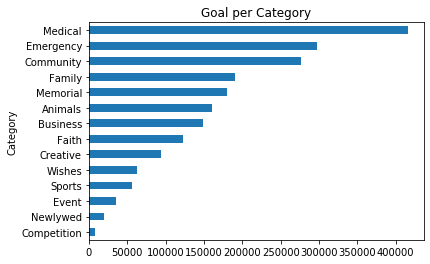

In [38]:
grouped_df['Goal'].sort_values().plot(kind = 'barh')
plt.title('Goal per Category')

Text(0.5, 1.0, 'FB Shares per Category')

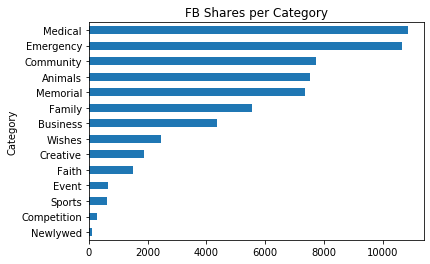

In [39]:
grouped_df['FB_Shares'].sort_values().plot(kind = 'barh')
plt.title('FB Shares per Category')

Text(0.5, 1.0, 'Followers per Category')

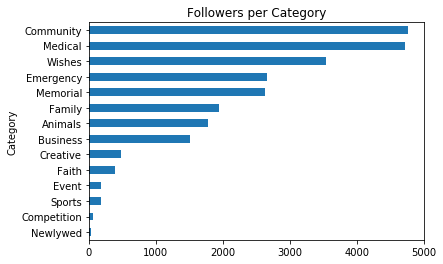

In [40]:
grouped_df['Followers'].sort_values().plot(kind = 'barh')
plt.title('Followers per Category')

## Visualizations on Amount_Raised

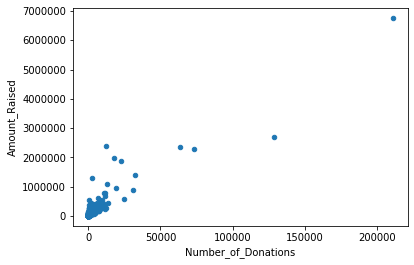

In [41]:
df.plot(kind='scatter', x ='Number_of_Donations', y = 'Amount_Raised')

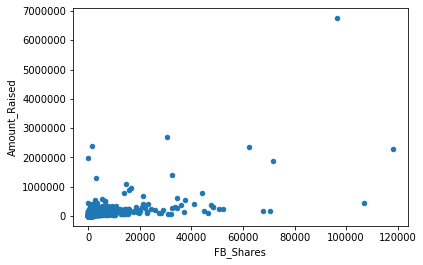

In [42]:
df.plot(kind='scatter', x='FB_Shares', y='Amount_Raised')

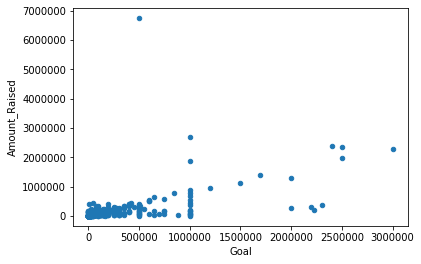

In [43]:
df.plot(kind='scatter', x='Goal', y='Amount_Raised')

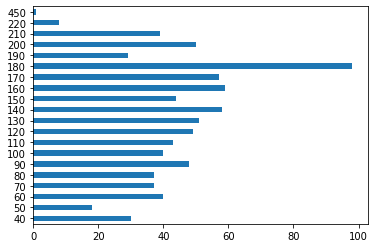

In [44]:
df['Length_of_Fundraising'].round(-1).value_counts().sort_index().plot(kind='barh')

# Geopandas 

In [69]:
from shapely.geometry import Point
import geocoder

In [72]:
locations = df['Location'].drop(557).apply(lambda x: geocoder.google(x).latlng)

0      None
1      None
2      None
3      None
4      None
       ... 
881    None
882    None
883    None
884    None
885    None
Name: Location, Length: 835, dtype: object